In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# from SedCas import SedCas

import os 
import numpy as np

%matplotlib inline

In [10]:
"""
Created on Thu Feb  3 16:56:57 2022

@author: hirschbe
"""

from SedCas import SedCas
# 
model = SedCas()
model.load_climate()
model.load_params()
model.run_hydro()
# model.run_sediment()
model.save_output()
model.plot_sedyield_monthly()


s variable                      depth  ddepth  sacc     smelt  albedo
D                                                         
2010-01-01 00:00:00    0.0     0.0   0.0  1.606091    0.15
2010-01-01 01:00:00    0.0     0.0   0.0  0.000000    0.15
2010-01-01 02:00:00    0.0     0.0   0.0  0.000000    0.15
2010-01-01 03:00:00    0.0     0.0   0.0  0.000000    0.15
2010-01-01 04:00:00    0.0     0.0   0.0  0.000000    0.15
...                    ...     ...   ...       ...     ...
2021-12-31 19:00:00    0.0     0.0   0.0  0.000000    0.15
2021-12-31 20:00:00    0.0     0.0   0.0  0.000000    0.15
2021-12-31 21:00:00    0.0     0.0   0.0  0.000000    0.15
2021-12-31 22:00:00    0.0     0.0   0.0  0.000000    0.15
2021-12-31 23:00:00    0.0     0.0   0.0  0.000000    0.15

[105192 rows x 5 columns]
...
...
...
hydro variable [                            Q   Qs       Qss         Vw  snow  snowacc  \
D                                                                        
2010-01-01 00:00:00

/Users/varyabazilova/Desktop/sedcas/varya_project/wsl_stay_10oct2022/glaciers_2/modules.py:373: RuntimeWarning: divide by zero encountered in double_scalars
  b = 1. - np.exp(-a*Vw[i,0]/float(s.Scap[0]))


hydro variable [                            Q   Qs       Qss         Vw  snow  snowacc  \
D                                                                        
2010-01-01 00:00:00  0.000000  0.0  0.000000   0.000000   0.0      0.0   
2010-01-01 01:00:00  0.000001  0.0  0.000001   0.031086   0.0      0.0   
2010-01-01 02:00:00  0.000004  0.0  0.000004   0.065341   0.0      0.0   
2010-01-01 03:00:00  0.000008  0.0  0.000008   0.080020   0.0      0.0   
2010-01-01 04:00:00  0.000012  0.0  0.000012   0.082674   0.0      0.0   
...                       ...  ...       ...        ...   ...      ...   
2021-12-31 19:00:00  0.079747  0.0  0.079747  34.038026   0.0      0.0   
2021-12-31 20:00:00  0.080104  0.0  0.080104  33.957924   0.0      0.0   
2021-12-31 21:00:00  0.080452  0.0  0.080452  33.877474   0.0      0.0   
2021-12-31 22:00:00  0.080791  0.0  0.080791  33.796685   0.0      0.0   
2021-12-31 23:00:00  0.081122  0.0  0.081122  33.724651   0.0      0.0   

                     

AttributeError: 'SedCas' object has no attribute 'sed'

In [11]:
#model.HRUs[2]# == 'glacier'
model.HRUs

['forest', 'bedrock', 'glacier']

In [12]:
hydro_out = pd.read_csv('Hydro.out')

In [13]:
hydro_out

,D,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt
0,2010-01-01 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.034913,20.576141,0.160609
1,2010-01-01 01:00:00,0.003650,3.108755e-03,0.000541,0.027437,0.0,0.0,0.000000,0.000000,0.031088,19.284302,0.000000
2,2010-01-01 02:00:00,0.004532,3.443472e-03,0.001088,0.056566,0.0,0.0,0.007400,0.000774,0.034435,21.075501,0.000000
3,2010-01-01 03:00:00,0.002378,1.865253e-03,0.000513,0.051202,0.0,0.0,0.147618,0.021638,0.018653,24.665222,0.000000
4,2010-01-01 04:00:00,0.001154,1.147948e-03,0.000006,0.041337,0.0,0.0,0.305144,0.020191,0.011479,27.521057,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2021-12-31 19:00:00,0.039874,1.862645e-07,0.039874,17.019018,0.0,0.0,0.000000,0.000000,0.000002,25.442169,0.000000
105188,2021-12-31 20:00:00,0.040052,1.862645e-07,0.040052,16.978968,0.0,0.0,0.000000,0.000000,0.000002,24.321655,0.000000
105189,2021-12-31 21:00:00,0.040226,1.862645e-07,0.040226,16.938743,0.0,0.0,0.000000,0.000000,0.000002,22.749420,0.000000
105190,2021-12-31 22:00:00,0.040396,1.862645e-07,0.040396,16.898349,0.0,0.0,0.000000,0.000000,0.000002,21.487793,0.000000


In [14]:
model.run_sediment()

running sediment module...


  0%|                                                         | 0/1 [00:00<?, ?it/s]/Users/varyabazilova/Desktop/sedcas/varya_project/wsl_stay_10oct2022/glaciers_2/modules.py:974: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcond['cond2'][1:] = dfcond.cond1[:-1]
100%|█████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


In [15]:
model.save_output()


hello world


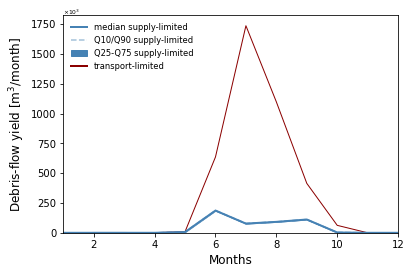

In [16]:
model.plot_sedyield_monthly()
